# Projekt UMA - Natalia Jaśkowska

# Temat projektu
Tematem projektu jest implementacja zmodyfikowanego algorytmu generowania lasu losowego klasyfikacji, gdzie do generowania kolejnych drzew wykorzystane są częściej elementy zbioru uczącego, na których model popełnia większe błędy.

# Zrealizowane założenia oraz użyte biblioteki

Projekt został napisany w języku programowania Python. Jest to język, który pozwala na szybką oraz
prostą implementację algorytmów. Natomiast wadą jest niestety prędkość działania.
W implementacji używam następujących modułów:

- pandas - moduł pozwalająca na prostą manipulację danymi i analizę danych, oferuje potrzebne nam
struktury danych.
- numpy - moduł pozwalająca na szybkie operacja na macierzach oraz wektora.
- random - moduł zawierająca wiele pseudo-losowych generatorów dla wielu rodzajów rozkładów.
- sklearn - biblioteka oprogramowania do uczenia maszynowego dla języka programowania Python .

Dwa etapy projektu obejmowały następujące kroki, które zostały zrealizowane:

1. Wstępne przetwarzanie danych: 
    - Po pierwsze, zbiór danych musiał być wstępnie przetworzony. Obejmowało to czyszczenie danych, obsługę brakujących wartości i konwersję zmiennych kategorycznych na wartości liczbowe. Następnie dane zostały podzielone na zestaw treningowy i walidacyjny stosując waliadcję krzyżową.
2. Implementacja algorytmu C4.5:
    -  Kolejnym krokiem była implementacja algorytmu C4.5, który jest ulepszeniem algorytmu ID3. Algorytm C4.5 został wykorzystany do wygenerowania drzew decyzyjnych, które składają się na las losowy. Algorytm ten uwzględnia zysk informacyjny i współczynnik zysku przy wyborze najlepszego atrybutu do podziału drzewa.
3. Implementacja algorytmu Random Forest:
    - Po zaimplementowaniu algorytmu C4.5 kolejnym etapem była implementacja zmodyfikowanego algorytmu random forest'a. Polegała ona na wygenerowaniu określonej liczby drzew (n_trees) przy użyciu algorytmu C4.5 oraz aktualizacji wag błędnie sklasyfikowanych rekordów po każdej iteracji. Wagi błędnie sklasyfikowanych rekordów są zwiększane, dzięki czemu prawdopodobieństwo włączenia tych rekordów do próby dla kolejnego drzewa będzie większe.
4.  Bootstrap Sampling:
    - Dla każdego drzewa w lesie losowym, ze zbioru treningowego jest wylosowana próbka bootstrapowa (z zastąpieniem). Rozmiar próbki będzie równy oryginalnemu zestawowi treningowemu, ale błędnie sklasyfikowane rekordy będą miały wyższe wagi, jak wspomniano w kroku 3.
5. Głosowanie na drzewie: 
    - Po wygenerowaniu lasu losowego, każde drzewo będzie "głosować" nad klasyfikacją każdego rekordu w zbiorze testowym. Ostateczna klasyfikacja dla danego rekordu będzie określona przez większość głosów wszystkich drzew w lesie losowym.
6. Dostrajanie hiperparametrów:
    - Aby jeszcze bardziej poprawić wydajność zmodyfikowanego lasu losowego, hiperparametry takie jak liczba drzew (n_trees), maksymalna głębokość każdego drzewa oraz minimalna liczba próbek wymaganych do podziału węzła wewnętrznego zostały dostrajane przy użyciu technik takich jak wyszukiwanie w siatce lub wyszukiwanie losowe (random search).

# Eksperymenty z dokumnetacji wstępnej

Zrealizowane eksperymenty z dokumentacji wstępnej:


- Analiza macierzy konfuzji: Matryce konfuzji zostaną wygenerowane dla każdego z modeli, aby zapewnić szczegółowy podział ich wydajności klasyfikacji. Obejmuje to liczbę prawdziwych pozytywów (TP), prawdziwych negatywów (TN), fałszywych pozytywów (FP) i fałszywych negatywów (FN) dla każdej klasy.

- Efekt trudnego ważenia próbek na niezbalansowanych zbiorach danych: W tym eksperymencie został szczególnie analizowany wpływ zmodyfikowanego algorytmu random forest z trudnym ważeniem próbek na niezbalansowanych zbiorach danych treningowych. Stawiamy hipotezę, że ten zmodyfikowany algorytm będzie działał lepiej na niezrównoważonych zbiorach danych, zakładając zrównoważony zbiór danych walidacyjnych/testowych.

- Optymalizacja hiperparametrów: Dla każdego z modeli został przeprowadzony eksperyment poszukiwania optymalnych hiperparametrów.

- Analiza krzywej ROC: Krzywa ROC (Receiver Operating Characteristic) została wykreślona dla każdego z trzech modeli (zmodyfikowany las losowy z wagą i bez oraz Sklearn's Random Forest). Zapewni to wizualną reprezentację współczynnika prawdziwych pozytywów (czułość) w stosunku do współczynnika fałszywych pozytywów (1-specyficzność) dla każdego modelu.

# Precyzyjny opis algorytmów oraz opis zbiorów danych

## Algorytmy

**Szczegółowy opis użytych algorytmów Random Forest, C45 oraz ID3 został zawarty w dokumentacji wstępnej wraz z przykładami działania dla różnych zbiorów danych. Wraz z algorytmami zostały szczegółowo opisane heurystyki takie jak entropia czy zysk informacyjny oraz sposób ich liczenia.**

## Zbiory danych
**Opis zbiorów danych takich jak `Car Evaluation` oraz `Gender` został również szczegółowo przedstawiony w dokumentacji wstępnej. Jednak postaram się wylistować najważniejsze informacje ze zbiorów danych.**

### Car Evaluation 

Zbiór danych `Car Evaluation` zawiera informacje o ocenie samochodów, które zostały poddane badaniom. Zestaw danych zawiera 1728 wierszy i siedem kolumn. Każdy wiersz reprezentuje samochód, a każda kolumna reprezentuje jego atrybut. 

1. W zbiorze danych znajduje się 7 zmiennych, a wszystkie zmienne mają kategoryczny typ danych.
2. Wartości odpowiednio kolumn to: `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` i `class`.
3. `class` jest zmienną docelową.

- Zmienną docelową zbioru danych jest ocena, która jest sklasyfikowana w czterech kategoriach: unacc (nieakceptowalna), acc (akceptowalna), good oraz vgood (bardzo dobra). Kategorie te reprezentują jakość samochodu na podstawie kryteriów oceny.

- Dostępny zbiór nie posiada danych brakujących.

- Link do danych: "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

**Zbiór jest niezbalansowany, tak jak zostało to opisane w poprzedniej dokumentacji, a rozkład klas wygląda następująco**:

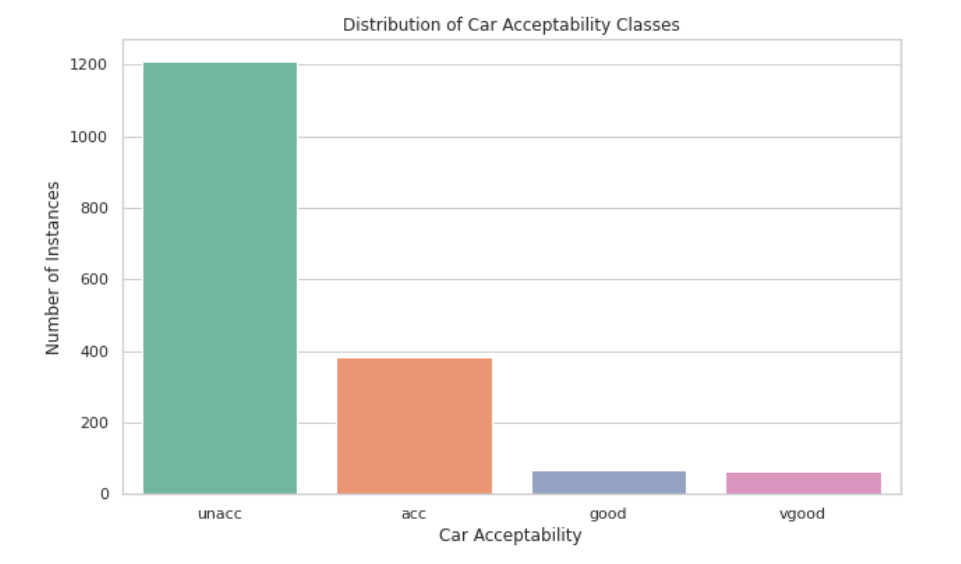

Zbiór danych jest niezrównoważony, przy czym klasa "unacc" (nieakceptowalna) ma znacznie więcej instancji niż inne klasy. Ten brak równowagi może wpłynąć na wydajność modelu, ponieważ może on być stronniczy w stosunku do klasy większościowej. Istotne jest, aby mieć to na uwadze podczas oceny modelu i rozważania potencjalnych technik rozwiązania problemu nierównowagi klas, takich jak ponowne próbkowanie lub użycie różnych metryk oceny.

### Gender

**Pełen opis oraz analiza zbioru została przedstawiona w dokumentacji wstępnej, jednak wyróżnie najważniejsze informacje o zbiorze pozwalające do poprawnego zinterpretowania wniosków oraz eksperymentów, które zostały opisane w sekcji poniżej.**

Zestaw danych Gender Classification na Kaggle jest zbiorem danych, który ma na celu przewidywanie płci osoby na podstawie pewnych atrybutów. Ten zestaw danych może być wykorzystany do trenowania modeli uczenia maszynowego do klasyfikacji płci i jest szczególnie przydatny do zrozumienia relacji między różnymi cechami i ich wpływu na przewidywanie płci.

Link: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

W zbiorze danych wyrózniamy atrybuty takie jak:

- long_hair - Ta kolumna zawiera 0 i 1, gdzie 1 oznacza "długie włosy", a 0 "nie długie włosy".
- forehead_width_cm - Ta kolumna jest w CM. Jest to szerokość czoła.
- forehead_height_cm - Jest to wysokość czoła i podana jest w Cm.
- nose_wide - Ta kolumna zawiera 0 i 1, gdzie 1 oznacza "szeroki nos", a 0 "nie szeroki nos".
- nose_long - Ta kolumna zawiera 0 i 1, gdzie 1 oznacza "długi nos", a 0 "nie długi nos".
- lips_thin - Ta kolumna zawiera 0 i 1, gdzie 1 reprezentuje "cienkie usta", a 0 to "Nie cienkie usta".
- distance_nose_to_lip_long - Ta kolumna zawiera 0 i 1, gdzie 1 oznacza "dużą odległość między nosem a ustami", podczas gdy 0 oznacza "małą odległość między nosem a ustami".

Naszą klasą jest przewidywanie płci:

- gender - "Male" albo "Female".



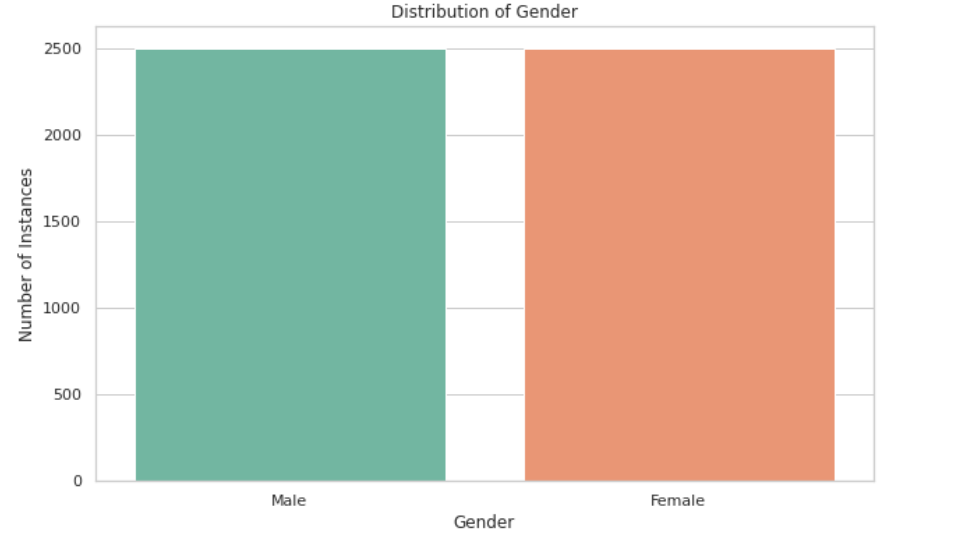

Na podstawie powyższego histogramu, widać że zbiór danych jest zbalansowany.

Zrównoważony zbiór danych zmniejsza bias w modelu, zapobiegając nadmiernemu wpływowi klasy większościowej. Innymi słowy, zapewnia, że model nie jest stronniczy w przewidywaniu klasy większościowej i ignorowaniu klasy mniejszościowej.

# Implementacja algorytmów wraz z opisem funkcjonalności

Szczegółowy opis użytych algorytmów **Random Forest, C45** oraz **ID3** został zawarty w dokumentacji wstępnej wraz z przykładami działania dla różnych zbiorów danych. Wraz zalgorytmami zostały szczegółowo opisane heurystyki takie jak entropia czy zysk informacyjny oraz sposób ich liczenia.

## Implementacja ID3

Poniżej znajduje się szczegółowy opis implementacji algorytmu ID3 oraz obliczeń entropii i zysku informacyjnego, które zrealizowałam.

Zaimplementowałam klasy `Node` i `Leaf` reprezentujące węzeł i liść w drzewie decyzyjnym. Węzeł przechowuje informację o cechach i swoich potomkach, którzy mogą być kolejnymi węzłami lub liśćmi. Liść przechowuje wartość, która jest przewidywaną etykietą dla danej ścieżki w drzewie.

Następnie zaimplementowałam główną klasę `ID3`, która implementuje algorytm drzewa decyzyjnego ID3. 

Poniżej opisuję, jakie funkcje pełnią poszczególne metody w tej klasie:

1. `__init__(self, max_depth, features_to_use: Optional[List[str]] = None, threads=None)`: Ta metoda jest konstruktorem klasy ID3, który inicjalizuje obiekt tej klasy. Parametry, które ta funkcja przyjmuje to:
    - `max_depth` (wymagane): Maksymalna głębokość drzewa. Jest to liczba, która określa, jak głęboko drzewo może być zbudowane. Głębokość drzewa to najdłuższa ścieżka od korzenia do liścia. Ustawienie zbyt dużej głębokości może prowadzić do przeuczenia modelu.
    - `features_to_use` (opcjonalne): Lista cech, które mają być używane do budowy drzewa. Jeżeli nie jest określone, używane są wszystkie cechy.
    - `threads` (opcjonalne): Liczba wątków do użycia podczas przewidywania. Jeżeli nie jest określone, używany jest jeden wątek.

2. `_information_gain(self, X: pd.DataFrame, Y: pd.Series, x: str) -> float`: Ta prywatna metoda oblicza i zwraca zysk informacyjny dla danej kolumny `x`. Zysk informacyjny jest miarą zmniejszenia entropii po podziale zbioru danych względem danej cechy. Parametry, które ta funkcja przyjmuje to:
    - `X` (wymagane): DataFrame zawierający cechy.
    - `Y` (wymagane): Series zawierający etykiety.
    - `x` (wymagane): Nazwa cechy, dla której obliczany jest zysk informacyjny.

3. `_max_information_gain(self, X: pd.DataFrame, Y: pd.Series) -> str`: Ta prywatna metoda oblicza zysk informacyjny dla wszystkich cech i zwraca nazwę cechy, która daje maksymalny zysk informacyjny. Parametry, które ta funkcja przyjmuje to:
    - `X` (wymagane): DataFrame zawierający cechy.
    - `Y` (wymagane): Series zawierający etykiety.

4. `_fit_algorithm(self, X: pd.DataFrame, Y: pd.Series, depth: int) -> Union[Node, Leaf]`: Ta prywatna metoda implementuje główny algorytm ID3. Parametry, które ta funkcja przyjmuje to:
    - `X` (wymagane): DataFrame zawierający cechy.
    - `Y` (wymagane): Series zawierający etykiety.
    - `depth` (wymagane): Aktualna głębokość drzewa.

5. `fit(self, X: pd.DataFrame, Y: pd.Series) -> None`: Ta metoda służy do dopasowania modelu do danych. Parametry, które ta funkcja przyjmuje to:
    - `X` (wymagane): DataFrame zawierający cechy. Wszystkie wartości powinny być już przetworzone i gotowe do użycia w modelu.
    - `Y` (wymagane): Series zawierający etykiety. Te etykiety są wartościami, które model będzie próbował przewidzieć.

6. `_predict_single(self, sample: Dict[str, Any]) -> str`: Ta prywatna metoda przewiduje etykietę dla pojedynczego przykładu. Parametry, które ta funkcja przyjmuje to:
    - `sample` (wymagane): Słownik reprezentujący pojedynczy przykład. Klucze to nazwy cech, a wartości to odpowiadające im wartości dla tego przykładu.

7. `predict(self, X: pd.DataFrame) -> Iterable[Any]`: Ta metoda przewiduje etykiety dla zbioru danych. Parametry, które ta funkcja przyjmuje to:
    - `X` (wymagane): DataFrame zawierający cechy. Wszystkie wartości powinny być już przetworzone i gotowe do użycia w modelu.

Podczas implementacji, metody `_information_gain` i `_max_information_gain` są wykorzystywane do określenia najważniejszych cech dla podziału danych, co jest kluczowym krokiem w budowaniu drzewa decyzyjnego. Wykorzystują one metrykę zwaną zyskiem informacyjnym, która mierzy redukcję niepewności (entropii) po podziale danych względem danej cechy. Najważniejsze cechy to te, które najbardziej redukują niepewność i zwiększają czystość podziałów.

Entropię oblicza się za pomocą wzoru:
```
H(Y) = - sum(p_i * log2(p_i))
```
gdzie `p_i` to prawdopodobieństwo wystąpienia i-tej klasy w zbiorze `Y`.

Zysk informacyjny oblicza się za pomocą wzoru:
```
IG(Y|X) = H(Y) - H(Y|X)
```
gdzie `H(Y)` to entropia zbioru `Y`, a `H(Y|X)` to średnia ważona entropii podzbiorów `Y` po podziale względem `X`.

Zysk informacyjny mierzy, jak dużo informacji zyskujemy o `Y` po podziale względem `X`. Im większy zysk informacyjny, tym lepiej cecha `X` rozdziela klasy w `Y`, a więc cecha `X` jest bardziej wartościowa dla modelu.



## Implementacja C45

Klasa `C45` jest główną klasą implementującą algorytm C4.5. Kiedy tworzymy instancję tej klasy, możemy zdefiniować parametry takie jak maksymalna głębokość drzewa (`max_depth`), cechy dyskretne (`discrete_features`), stosunek danych używanych do walidacji (`validation_ratio`) na którym jest użyty pruning, opcjonalne ziarno dla losowości (`random_seed`) oraz kryterium, które determinuje jak wybieramy najlepszy podział (`criterion`). Dostępne kryteria to `gain_ratio` i `inf_gain`.

Metoda `fit` jest używana do trenowania modelu na zestawie danych wejściowych X i etykietach Y. W trakcie trenowania, metoda dzieli dane na zestaw treningowy i walidacyjny, a następnie wywołuje funkcję `_fit_algorithm` do budowy drzewa decyzyjnego. Wreszcie, drzewo jest przycinane używając zestawu walidacyjnego.

Następnie, zaimplementowałam metodę `_fit_algorithm`, która wykonuje główną część procesu trenowania drzewa decyzyjnego. Funkcja `_fit_algorithm` jest funkcją rekurencyjną, która buduje drzewo decyzyjne. Na początku sprawdza, czy przekroczyła maksymalną głębokość, czy wszystkie etykiety są takie same, czy nie ma już cech do rozważenia. Jeśli którykolwiek z tych warunków jest spełniony, funkcja zwraca liść z najczęstszą klasą. W przeciwnym razie, szuka najlepszego podziału za pomocą metody `_best_split`. Jeżeli nie ma możliwych podziałów, zwraca liść. W przeciwnym razie, tworzy węzeł i rekurencyjnie wywołuje się na podzbiorach danych.

Metoda `_best_split` szuka najlepszego podziału dla danego zestawu danych. Dla każdej cechy, oblicza stosunek zysku (lub zysk informacyjny, w zależności od wybranego kryterium) dla wszystkich możliwych podziałów i zwraca podział z największym zyskiem.

Metoda `_predict_node` odpowiada za prognozowanie na podstawie konkretnego węzła. W zależności od typu węzła, różne podejście jest stosowane. Dla liści, zwracane są prognozy zgodnie z etykietą liścia. Dla węzła kategorycznego, metoda grupuje dane według wartości cechy i wykonuje predykcje dla każdej grupy. Dla węzła progowego, dane są dzielone na podstawie progu i dla każdej części są wykonywane predykcje.

Metoda `predict` pozwala na przewidywanie etykiet dla nowych danych wejściowych X. Wywołuje funkcję `_predict_node` na korzeniu drzewa, która rekurencyjnie przechodzi przez drzewo i zwraca przewidziane etykiety.

Funkcja `_error` oblicza błąd prognozy, porównując prawdziwe i prognozowane etykiety. Zwraca średnią wartość błędów.

Metoda `_prune` jest odpowiedzialna za przycinanie drzewa decyzyjnego. W zależności od typu węzła, różne podejście jest stosowane. W przypadku `CategoricalNode`, metoda przechodzi przez wszystkie dzieci i próbuje je przyciąć. Następnie, porównuje błąd przed i po przycięciu i decyduje, czy przyciąć drzewo na stałe. Analogicznie, dla `ThresholdNode`, metoda próbuje przyciąć lewe i prawe dzieci, a następnie porównuje błędy.

Klasa `C45` zawiera również trzy typy węzłów: `Leaf`, `CategoricalNode` i `ThresholdNode`. `Leaf` reprezentuje liść drzewa i przechowuje etykietę, która jest przewidywana, gdy instancja dociera do tego liścia. `CategoricalNode` jest węzłem, który dokonuje podziału na podstawie kategorycznej cechy, a `ThresholdNode` jest węzłem, który dokonuje podziału na podstawie cechy ciągłej. 

Zaimplementowana klasa `C45` zawiera także kilka metod służących do obliczania różnych metryk używanych podczas budowy drzewa decyzyjnego.

1. `entropy(y)`: Metoda ta oblicza entropię dla podanego zestawu etykiet `y`.

2. `information_gain(y, y1, y2)`: Metoda ta oblicza tzw. zysk informacyjny dla podziału zestawu etykiet `y` na dwa podzbiory `y1` i `y2`.

3. `gini_index(y)`: Metoda ta oblicza indeks Giniego dla podanego zestawu etykiet `y`. Indeks Giniego jest miarą zróżnicowania lub nierówności w zestawie danych; w kontekście drzewa decyzyjnego, może być używany jako alternatywa dla entropii do oceny jakości podziału.

4. `gini_gain(y, y1, y2)`: Metoda ta oblicza tzw. zysk Giniego dla podziału zestawu etykiet `y` na dwa podzbiory `y1` i `y2`. Zysk Giniego jest miarą tego, jak dużo "niezgody" (czyli zróżnicowania) usuwamy, dzieląc dane na podstawie pewnej cechy; w kontekście drzewa decyzyjnego, może być używany jako alternatywa dla zysku informacyjnego do decydowania, którą cechę użyć do podziału danych na danym etapie.

## Implementacja SklearnModel

Zaimplementowałam klasę `SklearnModel`, która służy jako opakowanie dla modeli dostarczonych przez bibliotekę scikit-learn. Głównym celem tej klasy jest konwersja danych tekstowych na dane numeryczne, które mogą być przetwarzane przez modele scikit-learn, a także konwersja wyników numerycznych z powrotem na dane tekstowe.

1. `__init__(self, model_class, discrete_feature_order: Dict[str, List[Any]], **kwargs)`: W konstruktorze tworzę instancję modelu scikit-learn, który zostanie użyty do trenowania i prognozowania. Inicjuję też słowniki, które będą służyły do mapowania wartości tekstowych na indeksy numeryczne i odwrotnie. Zmienna `discrete_feature_order` jest słownikiem, który pozwala określić preferowany porządek dla wartości poszczególnych cech dyskretnych.

2. `_sort_key(self, val, column)`: Zaimplementowałam tę prywatną funkcję, aby generować klucz służący do sortowania wartości cechy. Jeżeli dla danej kolumny nie określiłam porządku, zwracam niezmienioną wartość. W przeciwnym razie zwracam indeks wartości w zadanym porządku dla danej kolumny.

3. `fit(self, X: pd.DataFrame, Y: pd.Series)`: Ta metoda odpowiada za dopasowanie modelu do danych treningowych. Najpierw znajduję najczęściej występującą klasę w `Y` (która zostanie użyta później do obsługi nieznanych wartości cechy). Następnie tworzę mapowania dla wszystkich unikalnych wartości w każdej kolumnie `X` i `Y` (używając do tego metody `_sort_key`). Potem zastępuję wartości w `X` i `Y` odpowiadającymi im indeksami i dopasowuję model do tych przekształconych danych.

4. `predict(self, X: pd.DataFrame) -> Iterable[Any]`: Ta metoda służy do generowania predykcji na nowych danych. Najpierw zastępuję wartości w `X` odpowiadającymi im indeksami za pomocą mapowania `name2index`. Potem sprawdzam, czy są jakiekolwiek próbki, które zawierają wartość cechy, która nie pojawiła się podczas dopasowania (i zastępuję je najczęściej występującą klasą). Na końcu generuję predykcje modelu dla wszystkich próbek, które nie zawierają nieznanych wartości, i zwracam te predykcje jako wartości tekstowe.

Moja implementacja jest przykładem, jak można dostosować bibliotekę scikit-learn do obsługi danych tekstowych w sposób, który jest naturalny dla tego typu danych, jak i dla modeli, które normalnie wymagają danych numerycznych.


## Implemtacja zmodyfikowanego Random Forest'a

Zaimplementowałam klasę `RandomForest`, której głównym celem jest trenowanie i prognozowanie modelu lasu losowego - silnego modelu uczenia maszynowego, który tworzy ensemble (zbiór) drzew decyzyjnych.

1. W metodzie `__init__` zainicjowałam wszystkie parametry, które są potrzebne do stworzenia lasu losowego. Parametry te obejmują liczbę drzew w lesie (`n_estimators`), maksymalną liczbę cech, które mają być uwzględnione podczas tworzenia każdego drzewa (`max_features`), konstruktor drzewa (który pozwala na tworzenie różnych typów drzew, takich jak C45 lub ID3), a także różne parametry dotyczące próbkowania bootstrap (na przykład, czy zastępowanie jest dozwolone podczas próbkowania bootstrap i jaki procent próbek ma zostać wybrany).

2. Metoda `_generate_bootstrap_samples` jest używana do generowania próbek bootstrap, które są używane do trenowania każdego drzewa w lesie. Próbki bootstrap są generowane losowo z podmianą z oryginalnego zestawu danych, co pomaga wprowadzić różnorodność w model.

3. Zaimplementowałam również metodę `_get_max_features`, która decyduje, ile cech ma zostać uwzględnionych podczas tworzenia każdego drzewa w zależności od wartości `max_features`.

4. Metoda `_get_sample_probabilities` jest używana do obliczenia prawdopodobieństw dla każdej próbki w zestawie danych, które są następnie używane do generowania próbek bootstrap.

5. W metodzie `fit` trenuję las losowy. Dla każdego drzewa w lesie losowo wybieram cechy, generuję próbki bootstrap i dopasowuję drzewo do tych próbek. Kiedy drzewo jest trenowane, sprawdzam, jak dobrze prognozuje dla próbek, które nie były używane podczas jego trenowania (tzw. out-of-bag samples) i zapisuję te informacje do wykorzystania później.

6. Na końcu, w metodzie `predict`, prognozuję etykiety dla podanego zestawu próbek, korzystając z wszystkich drzew w lesie. Każde drzewo w lesie dokonuje swojej prognozy, a następnie wybieram najczęściej występującą prognozę z tych wszystkich prognoz jako ostateczną prognozę lasu losowego.

Zaimplementowałam więc pełne działanie modelu lasu losowego, począwszy od jego inicjalizacji, przez trenowanie poszczególnych drzew, aż po prognozowanie etykiet dla nowych próbek.

Jednak najbardziej efektywnym parametrem do realizacji projektu jest parametr `sampling_temperature`, dlatego zamierzam szczegółowo go opisać.

Parametr `sampling_temperature` jest używany w metodzie `_get_sample_probabilities` w celu regulacji prawdopodobieństwa wyboru konkretnych próbek podczas generowania zestawów bootstrap do trenowania drzew decyzyjnych. Metoda ta wykorzystuje błędy prognoz modelu na zestawie out-of-bag (OOB) do wyznaczenia tych prawdopodobieństw.

W szczególności, `sampling_temperature` jest używany do "temperowania" błędów, czyli do wpływania na rozkład prawdopodobieństwa próbek. Wartości błędów są podnoszone do potęgi równiej `sampling_temperature`, co wpływa na prawdopodobieństwo wyboru próbek podczas tworzenia nowych zestawów bootstrap.

Jeżeli `sampling_temperature` jest wysokie, wówczas różnice między prawdopodobieństwami poszczególnych próbek stają się mniej wyraźne. To oznacza, że próbki, na których model popełnia większe błędy, nie są znacznie częściej wybierane do nowych zestawów bootstrap. W efekcie, tworzone drzewa decyzyjne są mniej zróżnicowane.

Z drugiej strony, jeżeli `sampling_temperature` jest niskie, różnice między prawdopodobieństwami próbek są bardziej wyraźne. Próbki, na których model popełnia większe błędy, są wówczas znacznie częściej wybierane do nowych zestawów bootstrap. Tworzone drzewa decyzyjne są wtedy bardziej zróżnicowane, co może pomóc w poprawie generalizacji modelu.

Podsumowując, `sampling_temperature` jest parametrem, który pozwala regulować różnorodność tworzonych drzew decyzyjnych w modelu lasu losowego, a przez to również wpływać na zdolność modelu do generalizacji.

# Poprawność implementacji

In [334]:
from functools import partial

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble
import sklearn.linear_model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from multiprocessing import Pool

from algorithms.C45 import C45
from algorithms.ID3 import ID3
from algorithms.RandomForest import RandomForest
from algorithms.SklearnModel import SklearnModel
from utils import load_gender_dataset, load_car_dataset
import warnings
from typing import Tuple, Dict, List, Callable, Any, Iterable
warnings.filterwarnings('ignore')

### Load Dataset

In [235]:
def load_dataset(dataset_name: str):
    if dataset_name == 'gender':
        df, cols = load_gender_dataset()
    elif dataset_name == 'car':
        df, cols = load_car_dataset()
    else:
        raise ValueError("Invalid dataset name. Choose either 'gender' or 'car'.")
    return df, cols

In [324]:
for dataset in ['gender', 'car']:
    print('DATASET:', dataset)
    df, discrete_columns = load_dataset(dataset)

    X, Y = df.drop(columns=['target']), df['target']

    classifiers = [
        ('ID3', ID3(max_depth=100, features_to_use=list(set(discrete_columns.keys())))),
        ('C45',
         C45(max_depth=100, discrete_features=list(discrete_columns.keys()), validation_ratio=0.0, random_seed=42)),
        ('SklearnDecisionTree',
         SklearnModel(DecisionTreeClassifier, max_depth=100, discrete_feature_order=discrete_columns)),
        ('RandomForestID3', RandomForest(
            n_estimators=20, max_features=6, bootstrap_fraction=1, sampling_temperature=0,
            tree_constructor=partial(ID3, max_depth=100, features_to_use=list(set(discrete_columns.keys()))))),
        ('RandomForestC45', RandomForest(
            n_estimators=20, max_features=6, bootstrap_fraction=1, sampling_temperature=0,
            tree_constructor=partial(C45, max_depth=100, discrete_features=list(discrete_columns.keys()), validation_ratio=0.0, random_seed=42))),
        ('SklearnRandomForest', SklearnModel(sklearn.ensemble.RandomForestClassifier, discrete_feature_order=discrete_columns,
            n_estimators=20, max_features=6)),
    ]

    accuracies = []

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    for name, clf in classifiers:
        accuracies.append([])
        for train_idx, val_idx in skf.split(X, Y):
            clf.fit(X.iloc[train_idx], Y.iloc[train_idx])
            Y_pred = clf.predict(X.iloc[val_idx])
            accuracy = accuracy_score(Y.iloc[val_idx], Y_pred)
            accuracies[-1].append(accuracy)
        print(f"{name} Accuracy: {np.mean(accuracies[-1]):.4f} +/- {np.std(accuracies[-1]):.4f}")

#     names, acc_values = zip(*classifiers)
#     plt.figure(figsize=(15, 5))
#     sns.barplot(data=pd.DataFrame([(name, acc) for name, accs in zip(names, accuracies) for acc in accs]), x=0, y=1)
#     plt.ylabel('Accuracy')
#     plt.title('Comparison of Classifier Accuracies on the Gender Classification Dataset')
    
    print()

DATASET: gender
ID3 Accuracy: 0.9580 +/- 0.0035
C45 Accuracy: 0.9654 +/- 0.0055
SklearnDecisionTree Accuracy: 0.9648 +/- 0.0052
RandomForestID3 Accuracy: 0.9578 +/- 0.0033
RandomForestC45 Accuracy: 0.8727 +/- 0.1932
SklearnRandomForest Accuracy: 0.9688 +/- 0.0048

DATASET: car
ID3 Accuracy: 0.8976 +/- 0.0103
C45 Accuracy: 0.9346 +/- 0.0141
SklearnDecisionTree Accuracy: 0.9774 +/- 0.0067
RandomForestID3 Accuracy: 0.8976 +/- 0.0103
RandomForestC45 Accuracy: 0.9335 +/- 0.0136
SklearnRandomForest Accuracy: 0.9792 +/- 0.0065



## Dodatkowe funkcje

### Calculate Macro Accuracy 

In [7]:
def macro_accuracy(ground_truth, y_pred):
    cm = confusion_matrix(ground_truth, y_pred)
    class_accuracies = cm.diagonal() / cm.sum(axis=1)
    macro_accuracy = np.mean(class_accuracies)
    
    return macro_accuracy

### Show Report

In [8]:
def show_report(data: Dict[str, np.ndarray], dfname: str, name=""):
    """
    data[split_name] -> (ground_truth, predictions)
    where ground_truth and predictions have shape either (num_reps x num_samples) or (num_samples)
    Plots confusion matrix and bar plot(contains metrics and values of them) 
    """
    # map ground truths and predictions to 2d np.array if they are 1d.
    data = {k: tuple(map(lambda v: (v if len(v.shape) == 2 else v.reshape(1, -1)), vs)) for k, vs in data.items()}
    
    plt.figure(figsize=(20, 5 * len(data)))
    plt.suptitle(name)
    
    for i, (split, (ground_truth, preds)) in enumerate(data.items()):
        ax = plt.subplot(len(data), 2, 1 + 2 * i)
        plt.title(split)
        ConfusionMatrixDisplay.from_predictions(ground_truth.reshape(-1), preds.reshape(-1), normalize="all", ax=ax)
    
    plt.subplot(1, 2, 2)
    if dfname == "gender":
        metrics = [
        (accuracy_score, "accuracy"),
        (lambda *args: macro_accuracy(*args), "macro_accuracy"),
        # (lambda *args: precision_score(*args, pos_label=["Female", "Male"]), "precision"),
        # (lambda *args: recall_score(*args, pos_label=["Female", "Male"]), "recall"),
        # (lambda *args: f1_score(*args, pos_label=["Female", "Male"]), "f1"),
    ]
    if dfname == "car":
        metrics = [
            (accuracy_score, "accuracy"),
            (lambda *args: macro_accuracy(*args), "macro_accuracy"),
        ]

    df = pd.DataFrame.from_dict(
        {
            "value": [
                metric(gt[i], preds[i])
                for metric, _ in metrics
                for split, (gt, preds) in data.items()
                for i, _ in enumerate(gt)
            ],
            "split": [split for _, _ in metrics for split, (gt, _) in data.items() for _ in gt],
            "metric": [metric_name for _, metric_name in metrics for _, (gt, _) in data.items() for _ in gt],
        }
    )
    sns.barplot(df, x="metric", y="value", hue="split", errorbar='sd')

    plt.show()

## Szukanie najlepszych hiperparametrów

In [64]:
def evaluate_model(X, Y, model_constructor, model_args, n_splits=5, verbose=True):
    """
    Evaluates the model using cross-validation and calculates accuracy.

    Parameters
    ----------
    X : DataFrame
        Features data.
    Y : Series
        Target data.
    model_constructor : callable
        Constructor for the model.
    model_args : dict
        Arguments for the model constructor.
    n_splits : int, optional
        The number of folds in the cross-validation, by default 5.
    verbose : bool, optional
        Whether to display extra output or not, by default True.

    Returns
    -------
    float
        Accuracy of the model.
    """
    preds = []
    gt = []
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=model_args['random_seed'])
    for i, (train_indices, val_indices) in enumerate(skf.split(X, Y)):
        model = model_constructor(**model_args)
        model.fit(X.iloc[train_indices], Y.iloc[train_indices])
        preds.append(model.predict(X.iloc[val_indices]))
        gt.append(Y.iloc[val_indices])

    preds = np.concatenate(preds)
    gt = np.concatenate(gt)
    if verbose:
        ConfusionMatrixDisplay.from_predictions(gt, preds, normalize="all")
    return (preds == gt).mean()

In [270]:
def plot_factor_dependency(X, Y, model_constructor, name, values, default_args, reps=5, xlog=False, pool=__builtins__, show=True, evaluate_model=evaluate_model):
    """
    Plots the dependency of the model's accuracy on a specific factor.

    Parameters
    ----------
    X : DataFrame
        Features data.
    Y : Series
        Target data.
    model_constructor : callable
        Constructor for the model.
    name : str
        The name of the factor to vary.
    values : list
        The values of the factor to try.
    default_args : dict
        Default arguments to pass to the model constructor.
    reps : int, optional
        Number of times to repeat the evaluation for each factor value, by default 5.
    xlog : bool, optional
        Whether to use a logarithmic scale for the x-axis, by default False.
    pool : Pool, optional
        An optional multiprocessing pool to parallelize the evaluation, by default Python's built-in functions.
    show : bool, optional
        Whether to display the plot immediately or not, by default True.
    """
    res = {name: [], 'accuracy': []}
    for arg in values:
        args = default_args.copy()
        args[name] = arg
        
        for accuracy in pool.map(partial(evaluate_model, X, Y, model_constructor, verbose=False), [args | {'random_seed': i} for i in range(reps)]):
            res[name].append(arg)
            res['accuracy'].append(accuracy)

    
    df = pd.DataFrame.from_dict(res)
    plot_df = df.copy()
    if not all([isinstance(v, float) and not isinstance(v, int) for v in plot_df[name]]):
        plot_df[name] = plot_df[name].astype(str)
    sns.lineplot(data=plot_df, x=name, y='accuracy', errorbar='sd')
    sns.scatterplot(data=plot_df, x=name, y='accuracy', alpha=0.05)
    if xlog:
        plt.xscale('log')
    
    #Rysowanie poziomej najlepszej linnii
    aggregated_df = plot_df.groupby(name).mean().reset_index()
    row = aggregated_df[aggregated_df.accuracy == aggregated_df.accuracy.max()]
    value, acc = row[name].iloc[0], row['accuracy'].iloc[0]
    plt.axvline(value, linestyle='dashed', color='r')
    plt.title(f'{name}\nfound best {name}={value} with average accuracy {acc * 100:.2f}%')
    if show:
        plt.show()
        
    aggregated_df = df.groupby(name).mean().reset_index()
    row = aggregated_df[aggregated_df.accuracy == aggregated_df.accuracy.max()]
    value, acc = row[name].iloc[0], row['accuracy'].iloc[0]
    if str(type(value)).startswith("<class 'numpy."):
        value = value.item()
    best_args = default_args.copy()
    best_args[name] = value
    return best_args

In [11]:
def id3_constructor(random_seed, **kwargs): 
    return ID3(features_to_use=list(columns.keys()), **kwargs)

def c45_constructor(**kwargs):
    return C45(discrete_features=list(columns.keys()), **kwargs)

def sklearn_constructor(random_seed, **kwargs):
    return SklearnModel(model_class=DecisionTreeClassifier, discrete_feature_order=columns, **kwargs)

def tree_constructor(kind, **kwargs):
    if kind == 'id3':
        return id3_constructor(**kwargs)
    elif kind == 'c45':
        return c45_constructor(**kwargs)
    elif kind == 'sklearn':
        return sklearn_constructor(**kwargs)
    else:
        assert 0
        
def rf_constructor(tree_kwargs, random_seed, **kwargs):
    return RandomForest(**kwargs, tree_constructor=lambda: tree_constructor(**tree_kwargs, random_seed=random_seed))

W powyższym kodzie, zaimplementowałam następujące funkcje:

1. `load_dataset('gender')` - Ta funkcja ładuje zbiór danych o płci, zwracając ramkę danych oraz słownik kolumn.

2. `id3_constructor(random_seed, **kwargs)` - Jest to konstruktor dla algorytmu drzewa decyzyjnego ID3. Pozwala on na przekazanie różnych argumentów do algorytmu (dzięki wykorzystaniu `**kwargs`) oraz na ustawienie konkretnego ziarna losowości (`random_seed`), które jest używane do kontrolowania losowości algorytmu.

3. `c45_constructor(**kwargs)` - Podobnie jak wyżej, jest to konstruktor dla algorytmu C4.5. Również pozwala na przekazanie różnych argumentów do algorytmu za pomocą `**kwargs`.

4. `tree_constructor(kind, **kwargs)` - Ta funkcja to wyższy poziom abstrakcji, który pozwala na wybór między konstruktorem ID3 a C4.5, w zależności od przekazanego argumentu `kind`.

5. `rf_constructor(tree_kwargs, random_seed, **kwargs)` - Jest to konstruktor dla algorytmu Random Forest. Pozwala na przekazanie argumentów do konstruktora drzewa (`tree_kwargs`), ustawienie ziarna losowości (`random_seed`) oraz na przekazanie dodatkowych argumentów do algorytmu Random Forest za pomocą `**kwargs`. Co ciekawe, tworzy on funkcję `lambda`, która zwraca konstruktor drzewa, pozwalając na dynamiczne tworzenie drzew w algorytmie Random Forest.

W ten sposób, mogłam zaimplementować konstruktory dla różnych algorytmów, umożliwiając łatwe tworzenie i konfigurację modeli.

## Niezbalansowany Dataset -- Car DataSet

In [325]:
df, columns = load_dataset('car')
X, Y = df.drop(columns='target'), df['target']

In [226]:
X, Y, columns

(     buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns],
 0       unacc
 1       unacc
 2       unacc
 3       unacc
 4       unacc
         ...  
 1723     good
 1724    vgood
 1725    unacc
 1726     good
 1727    vgood
 Name: target, Length: 1728, dtype: object,
 {'buying': ['low', 'med', 'high', 'vhigh'],
  'maint': ['low', 'med', 'high', 'vhigh'],
  'doors': ['2', '3', '4', '5more'],
  'persons': ['2', '4', '

Dla powyższego zbioru mamy 6 atrybutów dyskretnych/kategorycznych, dla których zostaną przeprowadzone eskperymenty. Zgodnie z poprzednią dokumentacja rozrzut klas wyglądał w następujący sposób, gdzie klasą większościową jest `unacc`.
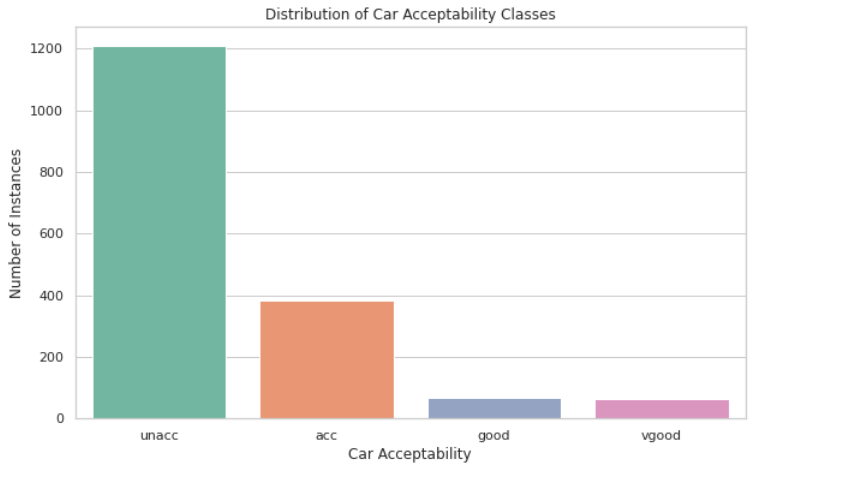

### Maximum Depth

Maksymalna głębokość drzewa jest istotnym parametrem w algorytmach drzew decyzyjnych, takich jak ID3. Wpływa on na złożoność modelu - mniejsza głębokość może prowadzić do niedopasowania (ang. underfitting), gdy model jest zbyt prosty, aby nauczyć się struktury danych, natomiast większa głębokość może prowadzić do przetrenowania (ang. overfitting), gdy model jest zbyt skomplikowany i "nauczy się na pamięć" danych treningowych, co będzie skutkowało słabym działaniem na nowych, niewidzianych danych.

Obliczenia zostały przyspieszone za pomocą współbieżności, gdzie każda iteracja walidacji krzyżowej była przeprowadzana równolegle (24 repetycji eksperymentu)

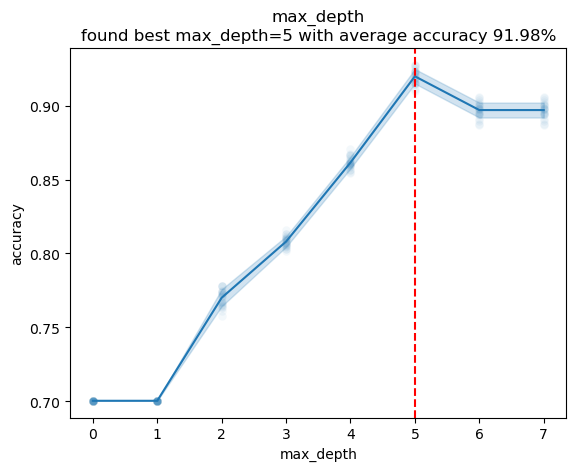

In [20]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, id3_constructor, 'max_depth', range(8), {}, reps=24, pool=pool)

Dla algorytmu ID3 najlepszą wartością dla maksymalnej głębokości drzewa decyzyjnego (max_depth) jest 5. Ustalanie tego parametru na wartość 5 pozwala osiągnąć średnią dokładność klasyfikacji na poziomie 91.98%. Spadek z wartości 5 na 6 dla `max_depth`, że ID3 zwraca najczęstszą powatzająca się klase, jeśli nie ma atrybutu w tym podziale.

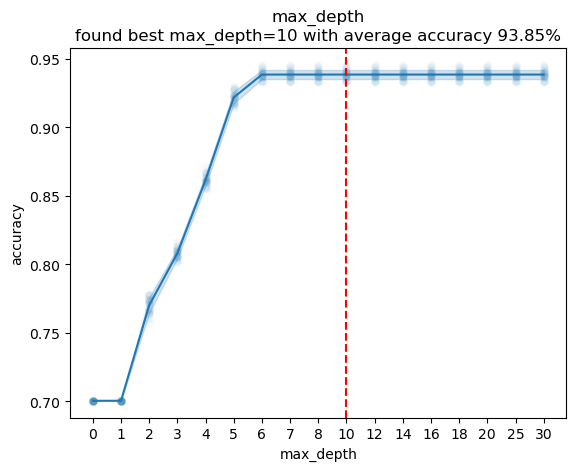

In [21]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, c45_constructor, 'max_depth', [0 , 1, 2, 3, 4, 5, 6, 7,
                                                        8, 10, 12, 14, 16, 18, 20, 25, 30], {'validation_ratio': 0, 'criterion': 'inf_gain'}, reps=24, pool=pool)

W przypadku używania algorytmu C4.5, maksymalna głębokość drzewa decyzyjnego (max_depth), która daje najwyższą średnią dokładność klasyfikacji, wynosi 10, a dokładność modelu wynosi 93.85%. Zastosowanie C4.5 z tym parametrem umożliwiło uzyskanie lepszej precyzji niż algorytm ID3 z maksymalną głębokością drzewa równą 5. Można z tego wywnioskować, że algorytm C4.5 jest w stanie lepiej modelować strukturę danego zestawu danych i jest bardziej odporny na przetrenowanie (overfitting) dzięki swojej zdolności do przycinania drzewa. Ustawienie parametru `validation-ratio` na wartość 0 oznacza, że w drzewie C45 nie występuje "pruning", drzewo strukturą podobne jest do drzewa zimportowanego z biblioteki Scikit-Learn, co pokaże w poniższym doświadczeniu.

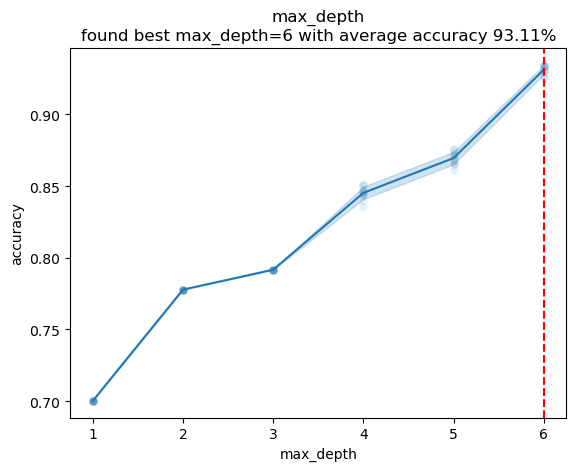

In [22]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, sklearn_constructor, 'max_depth', range(1, 7), {}, reps=24, pool=pool)

W odniesieniu do klasyfikatora z pakietu Scikit-Learn, najlepszym parametrem max_depth jest 6, co daje dokładność klasyfikacji na poziomie 93.11%. Jest to nieco mniej dokładne niż wyniki dla C4.5, ale nadal znacznie lepsze niż dla algorytmu ID3, co świadczy o poprawności zaimplementowania algorytmu C45/ID3.

### Validation Ratio

Parametr `validation_ratio` jest używany do określenia proporcji danych używanych do tworzenia drzewa, które są następnie wykorzystywane do przycinania drzewa. Głównym celem przycinania jest zapobieganie przetrenowaniu (overfitting) modelu, co zwykle występuje, gdy model jest zbyt złożony i "nauczył się na pamięć" danych treningowych. Przycinanie pomaga zredukować złożoność modelu i poprawić jego zdolność do generalizacji na nowych danych.

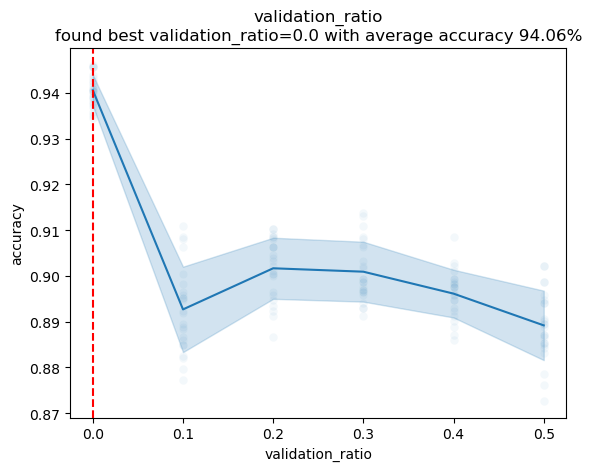

In [23]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, c45_constructor, 'validation_ratio', np.linspace(0, 0.5, 6), {'max_depth': 10}, reps=24, pool=pool)

Zgodnie z wynikami analizy najlepsza wartość validation_ratio dla algorytmu C4.5 wynosi 0, oznacza to, że algorytm działał najlepiej bez przycinania drzewa. 

Może to wynikać z następujących przyczyn:

1. Zestaw danych może być rzeczywiście zbyt mały, aby korzyści z przycinania stały się widoczne. Przycinanie jest najbardziej skuteczne, gdy mamy do czynienia z dużymi, skomplikowanymi drzewami, które są podatne na przetrenowanie. Jeżeli zestaw danych jest niewielki, model może nie być wystarczająco złożony, aby przetrenowanie było problemem.

2. Możliwe, że algorytm C4.5 już skutecznie radzi sobie z przetrenowaniem przez swoje podstawowe strategie tworzenia drzewa, a dodatkowe przycinanie nie jest potrzebne.

3. Struktura danych może być taka, że nawet pełne drzewo decyzyjne nie prowadzi do przetrenowania. Inaczej mówiąc, dane mogą być na tyle "proste", że pełne drzewo nie przekomplikowuje modelu.

### Max Features

Parametr `max_features` w modelu lasów losowych określa liczbę cech, które są brane pod uwagę przy wyborze najlepszego podziału w każdym węźle drzewa.

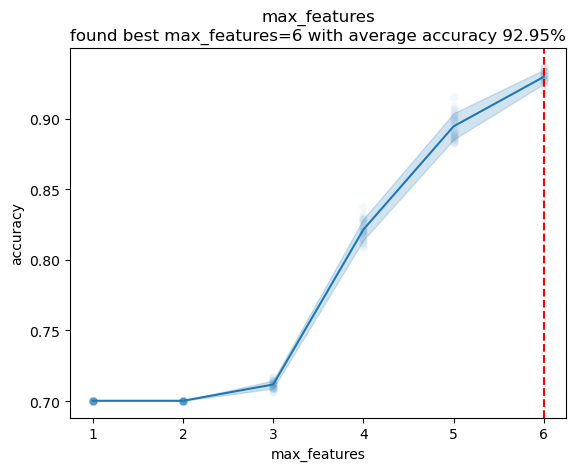

In [42]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'max_features', range(1,7),
                           {'n_estimators': 80, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'id3', 'max_depth': 5}},
                           reps=24, pool=pool)

W przypadku wykorzystania algorytmu ID3 w modelu lasu losowego, najlepszą wartością `max_features` okazało się 6, co odpowiada wszystkim cechom w danych (ponieważ zestaw danych ma 6 cech). Oznacza to, że model działał najlepiej, gdy każdy węzeł drzewa mógł rozważać wszystkie cechy podczas decydowania o podziale. Dokładność klasyfikacji wyniosła 92.95%.

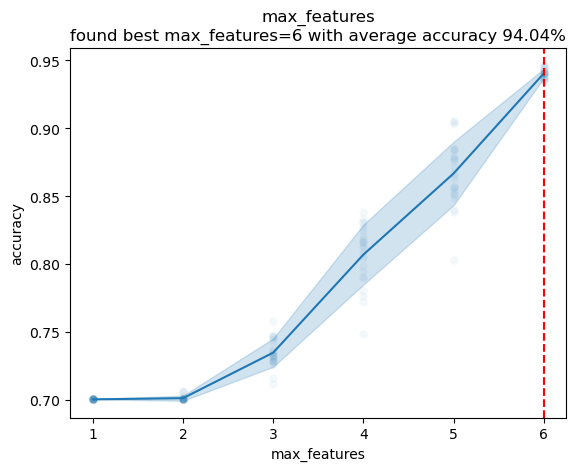

CPU times: user 359 ms, sys: 209 ms, total: 568 ms
Wall time: 2min 4s


In [44]:
%%time
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'max_features', range(1,7),
                           {'n_estimators': 10, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'c45', 'max_depth': 10, 'validation_ratio': 0}},
                           reps=24, pool=pool)

Podobnie, dla algorytmu C4.5 w modelu lasu losowego, najlepszą wartością `max_features` była również 6, co znowu odpowiada wszystkim cechom. Dokładność klasyfikacji wyniosła w tym przypadku 94.04%, co jest nieznacznie lepsze niż dla algorytmu ID3.

Podsumowując, zarówno dla algorytmu ID3, jak i C4.5, modele lasów losowych działały najlepiej, gdy każdy węzeł drzewa mógł rozważać wszystkie dostępne cechy podczas decydowania o podziale. To może sugerować, że wszystkie cechy w danych są istotne dla predykcji i że ograniczanie liczby rozważanych cech prowadzi do gorszej wydajności. Wszakże, ta zależność może się różnić dla różnych zestawów danych, dlatego zawsze warto przeprowadzić taką analizę dla danego problemu lub zestawu danych.

### Number of estimators

Parametr `n_estimators` w modelu lasów losowych określa liczbę drzew, które mają być utworzone w modelu. Jest to jeden z najważniejszych parametrów do dostrajania, ponieważ wpływa on bezpośrednio na wydajność modelu.

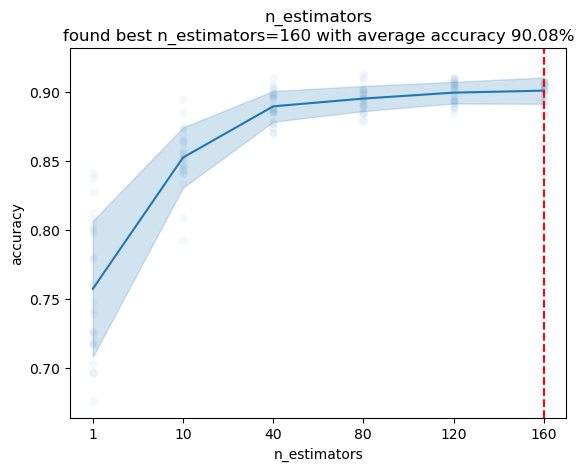

In [41]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'n_estimators', [1, 10, 40, 80, 120, 160],
                           {'max_features': 5, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'id3', 'max_depth': 5}},
                           reps=24, pool=pool)

Dla algorytmu ID3 maksymalna dokładność (90.08%) została osiągnięta dla `n_estimators` równego 160. To sugeruje, że dla tego konkretnego modelu i zestawu danych, większa liczba drzew prowadzi do lepszej wydajności.

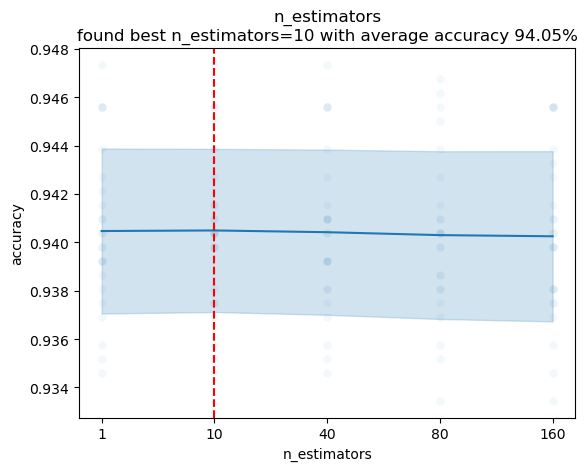

CPU times: user 407 ms, sys: 253 ms, total: 659 ms
Wall time: 27min 4s


In [29]:
%%time
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'n_estimators', [1, 10, 40, 80, 160],
                           {'max_features': 6, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'c45', 'max_depth': 10, 'validation_ratio': 0 }},
                           reps=24, pool=pool)

Dla algorytmu C4.5 z parametrem max_features równym 6, maksymalna dokładność (94.05%) została osiągnięta dla `n_estimators` równego 10. Jest to inny wynik niż dla algorytmu ID3 i pokazuje, że optymalna liczba drzew może się różnić w zależności od algorytmu i zestawu danych.

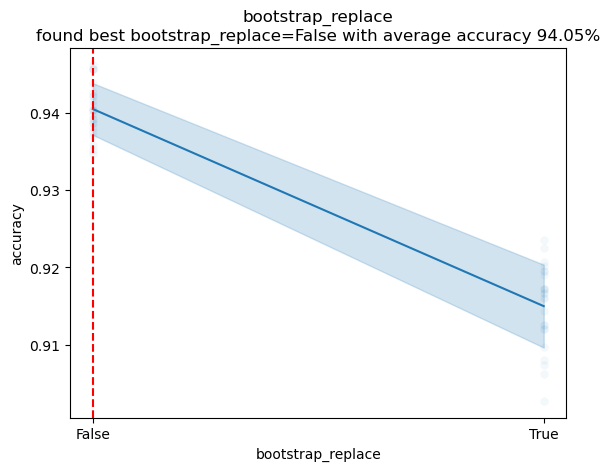

In [34]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'bootstrap_replace', [False, True],
                           {'max_features': 6, 'n_estimators': 1, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'c45', 'max_depth': 10, 'validation_ratio': 0 }},
                            reps=24, pool=pool)

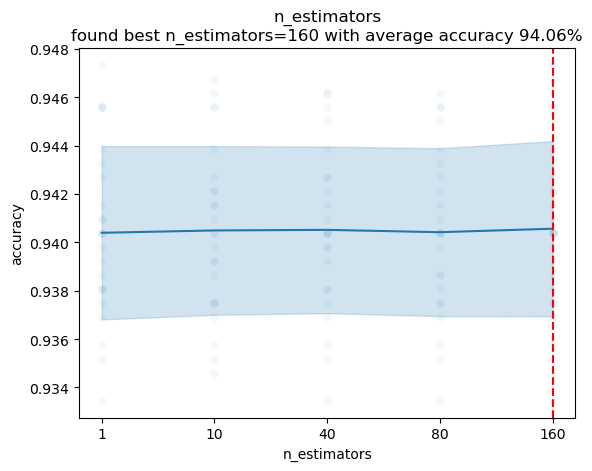

CPU times: user 339 ms, sys: 184 ms, total: 523 ms
Wall time: 26min 52s


In [35]:
%%time
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'n_estimators', [1, 10, 40, 80, 160],
                           {'max_features': 6, 'bootstrap_replace': False, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'c45', 'max_depth': 10, 'validation_ratio': 0}},
                           reps=24, pool=pool)

### Bootstrap Fraction

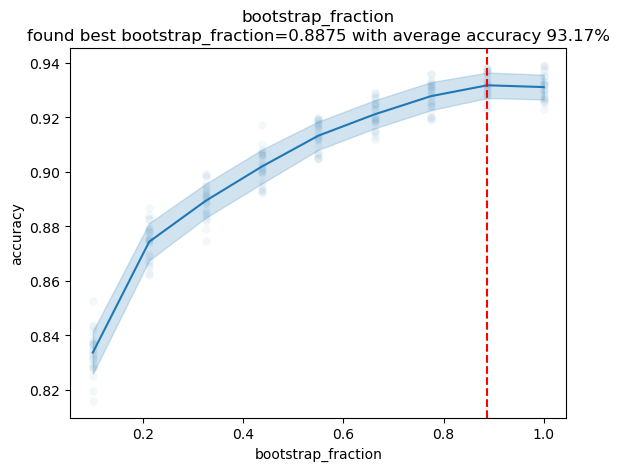

In [36]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'bootstrap_fraction', np.linspace(0.1, 1, 9),
                           {'max_features': 6, 'n_estimators': 10, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'id3', 'max_depth': 5}},
                           reps=24, pool=pool)

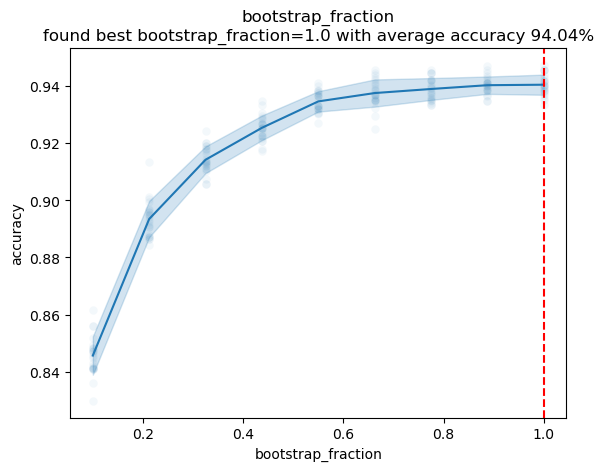

In [37]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'bootstrap_fraction', np.linspace(0.1, 1, 9),
                           {'max_features': 6, 'n_estimators': 10, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'c45', 'max_depth': 10, 'validation_ratio': 0}},
                           reps=24, pool=pool),

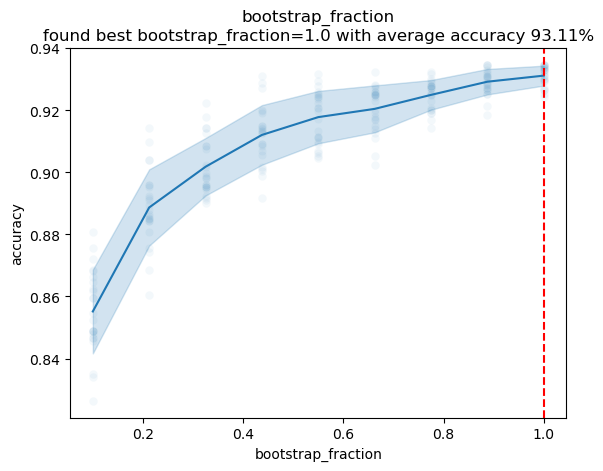

In [38]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'bootstrap_fraction', np.linspace(0.1, 1, 9),
                           {'max_features': 6, 'n_estimators': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'sklearn', 'max_depth': 6}},
                           reps=24, pool=pool)

### Sampling Temperature

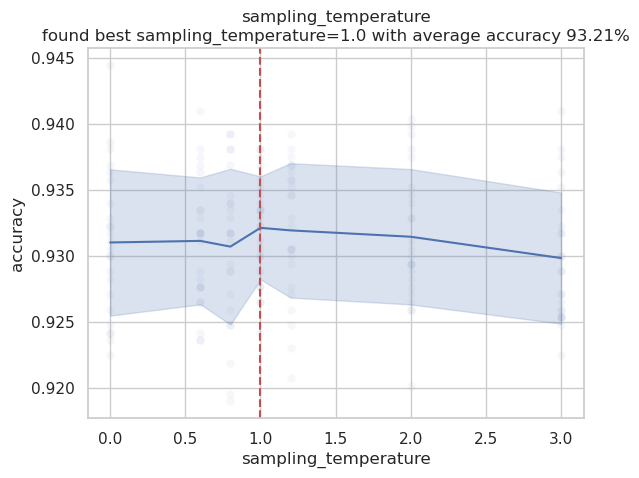

In [326]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'sampling_temperature', [0., 0.6, 0.8, 1, 1.2, 2., 3.],
                           {'n_estimators': 10, 'max_features': 6, 'bootstrap_fraction': 0.8875, 'tree_kwargs': {'kind': 'id3', 'max_depth': 5}},
                           reps=24, pool=pool)

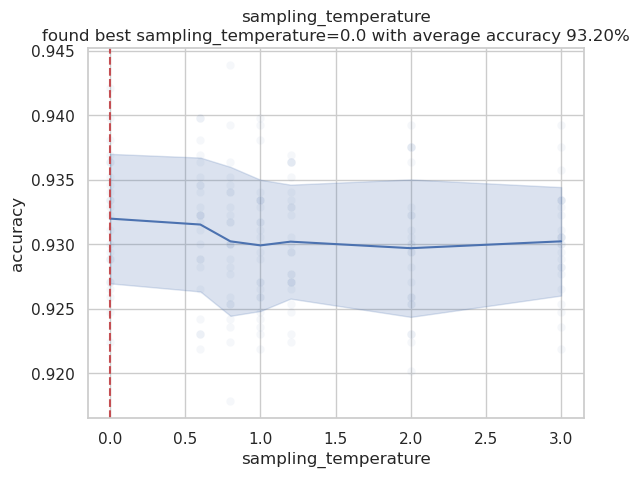

In [327]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'sampling_temperature', [0., 0.6, 0.8, 1, 1.2, 2., 3.],
                           {'n_estimators': 80, 'max_features': 6, 'bootstrap_fraction': 0.8875, 'tree_kwargs': {'kind': 'id3', 'max_depth': 5}},
                           reps=24, pool=pool)

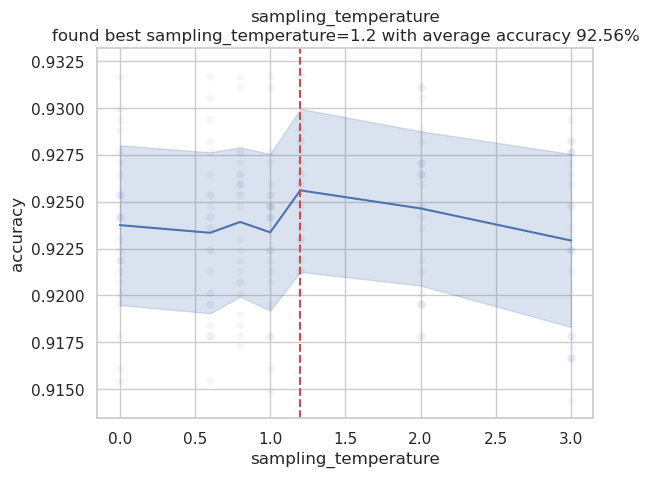

In [328]:
with Pool(24) as pool:
    plot_factor_dependency(X, Y, rf_constructor, 'sampling_temperature', [0., 0.6, 0.8, 1, 1.2, 2., 3.],
                           {'n_estimators': 10, 'max_features': 6, 'bootstrap_fraction': 1, 'tree_kwargs': {'kind': 'c45', 'max_depth': 10}},
                           reps=24, pool=pool)

## Evaluate model on best hyperparameters

0.9311342592592593

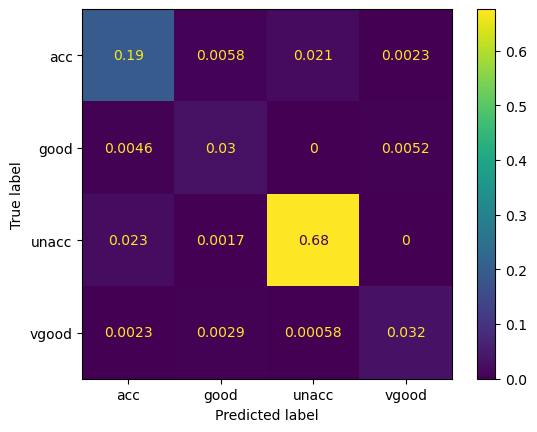

In [61]:
evaluate_model(X, Y, rf_constructor, {'n_estimators': 10, 'max_features': 6, 'tree_kwargs': {'kind': 'id3', 'max_depth': 5}, 'bootstrap_fraction': 0.8875,
                                     'sampling_temperature': 0.6, 'random_seed': 42})

0.9299768518518519

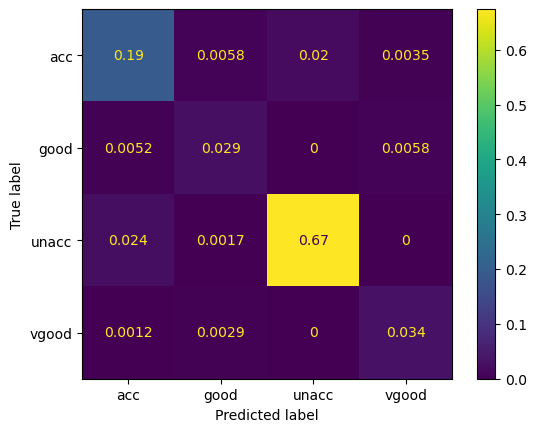

In [62]:
evaluate_model(X, Y, rf_constructor, {'n_estimators': 10, 'max_features': 6, 'tree_kwargs': {'kind': 'id3', 'max_depth': 5}, 'bootstrap_fraction': 0.8875,
                                     'sampling_temperature': 2, 'random_seed': 42})

0.9120370370370371

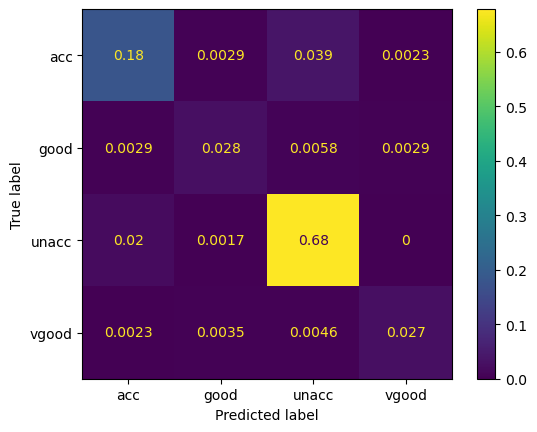

In [63]:
evaluate_model(X, Y, rf_constructor, {'n_estimators': 10, 'max_features': 6, 'tree_kwargs': {'kind': 'c45', 'max_depth': 10}, 'bootstrap_fraction': 1,
                                     'sampling_temperature': 2, 'random_seed': 42})

## Gender DataSet


In [329]:
df2, columns = load_dataset('gender')
X2, Y2 = df2.drop(columns='target'), df2['target']

columns

{'long_hair': [0, 1],
 'nose_wide': [0, 1],
 'nose_long': [0, 1],
 'lips_thin': [0, 1],
 'distance_nose_to_lip_long': [0, 1]}

In [208]:
id3_args = {}
c45_args = {'validation_ratio': 0}

### Max Depth

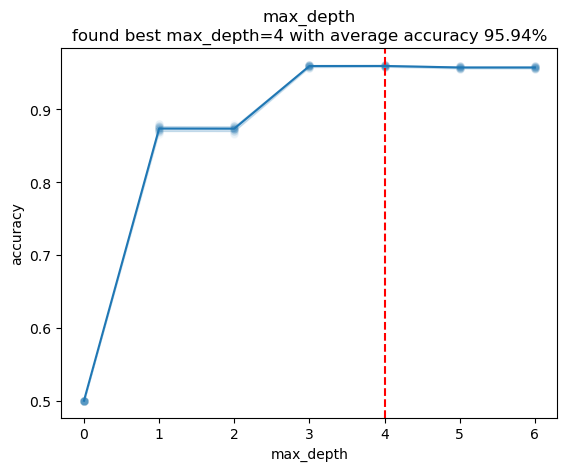

{'max_depth': 4}

In [209]:
with Pool(24) as pool:
    id3_args = plot_factor_dependency(X2, Y2, id3_constructor, 'max_depth', range(7), id3_args, reps=24, pool=pool)
id3_args

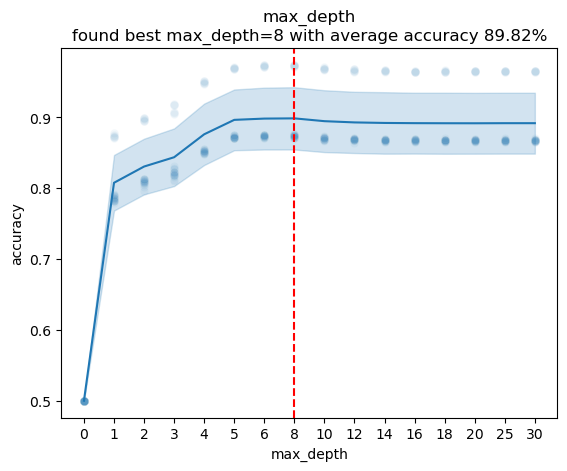

{'validation_ratio': 0, 'max_depth': 8}

In [210]:
with Pool(24) as pool:
    c45_args = plot_factor_dependency(X2, Y2, c45_constructor, 'max_depth', [0 , 1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30], c45_args, reps=24, pool=pool)
c45_args

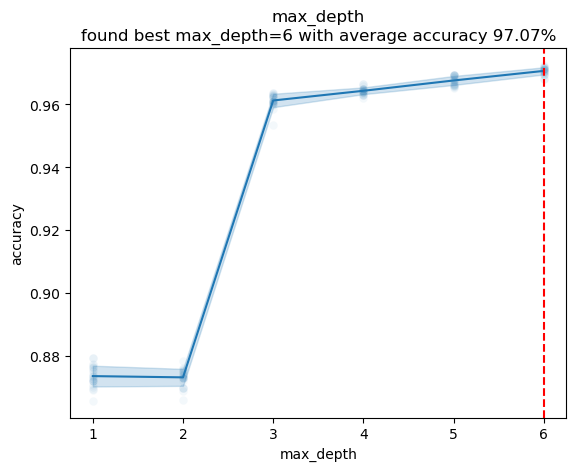

In [211]:
with Pool(24) as pool:
    plot_factor_dependency(X2, Y2, sklearn_constructor, 'max_depth', range(1, 7), {}, reps=24, pool=pool)

### Validation ratio

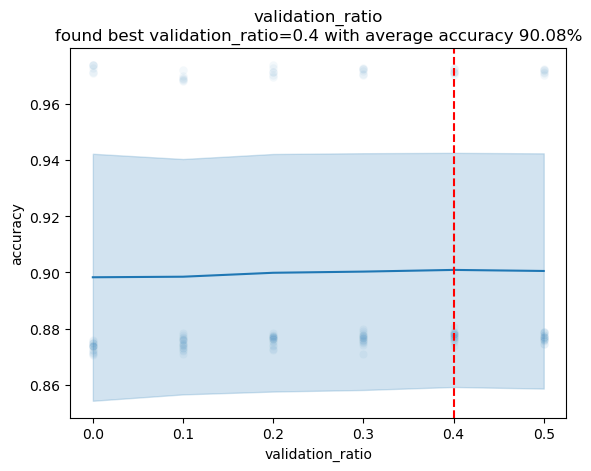

{'validation_ratio': 0.4, 'max_depth': 8}

In [212]:
with Pool(24) as pool:
    c45_args = plot_factor_dependency(X2, Y2, c45_constructor, 'validation_ratio', np.linspace(0, 0.5, 6), c45_args, reps=24, pool=pool)
c45_args

In [213]:
rl_id3_args = {'max_features': 5, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'id3', **id3_args}}
rl_c45_args = {'max_features': 5, 'bootstrap_fraction': 1, 'sampling_temperature': 0, 'tree_kwargs': {'kind': 'c45', **c45_args}}

### Number of estimators

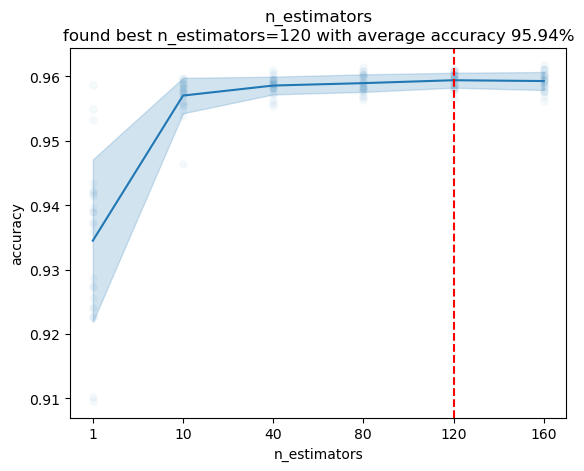

{'max_features': 5,
 'bootstrap_fraction': 1,
 'sampling_temperature': 0,
 'tree_kwargs': {'kind': 'id3', 'max_depth': 4},
 'n_estimators': 120}

In [214]:
with Pool(24) as pool:
    rl_id3_args = plot_factor_dependency(X2, Y2, rf_constructor, 'n_estimators', [1, 10, 40, 80, 120, 160], rl_id3_args, reps=24, pool=pool)
rl_id3_args

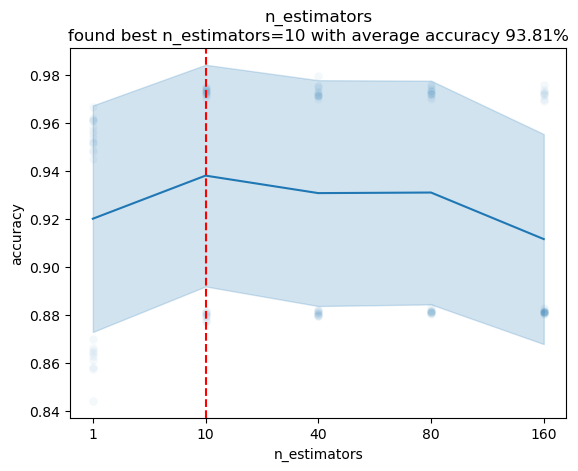

CPU times: user 476 ms, sys: 254 ms, total: 730 ms
Wall time: 1h 58min 10s


{'max_features': 5,
 'bootstrap_fraction': 1,
 'sampling_temperature': 0,
 'tree_kwargs': {'kind': 'c45', 'validation_ratio': 0.4, 'max_depth': 8},
 'n_estimators': 10}

In [215]:
%%time
with Pool(24) as pool:
    rl_c45_args = plot_factor_dependency(X2, Y2, rf_constructor, 'n_estimators', [1, 10, 40, 80, 160], rl_c45_args, reps=24, pool=pool)
rl_c45_args

### Max Features

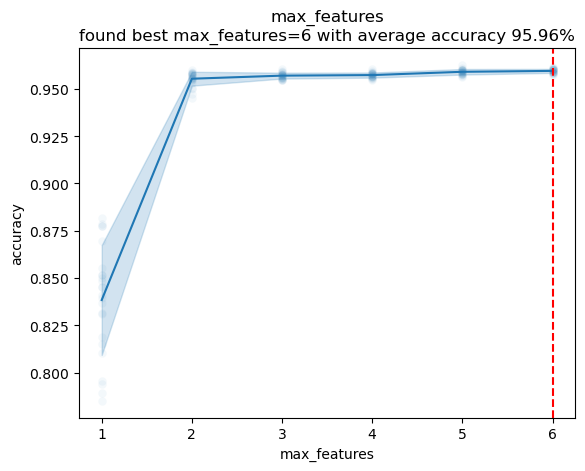

{'max_features': 6,
 'bootstrap_fraction': 1,
 'sampling_temperature': 0,
 'tree_kwargs': {'kind': 'id3', 'max_depth': 4},
 'n_estimators': 120}

In [216]:
with Pool(24) as pool:
    rl_id3_args = plot_factor_dependency(X2, Y2, rf_constructor, 'max_features', range(1,7), rl_id3_args, reps=24, pool=pool)
rl_id3_args

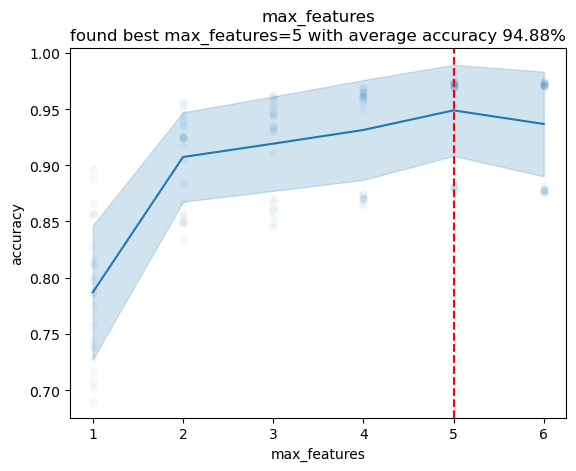

{'max_features': 5,
 'bootstrap_fraction': 1,
 'sampling_temperature': 0,
 'tree_kwargs': {'kind': 'c45', 'validation_ratio': 0.4, 'max_depth': 8},
 'n_estimators': 10}

In [217]:
with Pool(24) as pool:
    rl_c45_args = plot_factor_dependency(X2, Y2, rf_constructor, 'max_features', range(1,7), rl_c45_args, reps=24, pool=pool)
rl_c45_args

### Bootstrap fraction

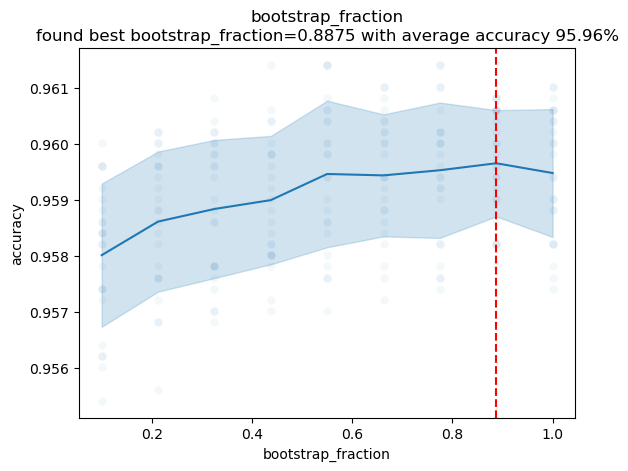

{'max_features': 6,
 'bootstrap_fraction': 0.8875,
 'sampling_temperature': 0,
 'tree_kwargs': {'kind': 'id3', 'max_depth': 4},
 'n_estimators': 120}

In [218]:
with Pool(24) as pool:
    rl_id3_args = plot_factor_dependency(X2, Y2, rf_constructor, 'bootstrap_fraction', np.linspace(0.1, 1, 9), rl_id3_args, reps=24, pool=pool)
rl_id3_args

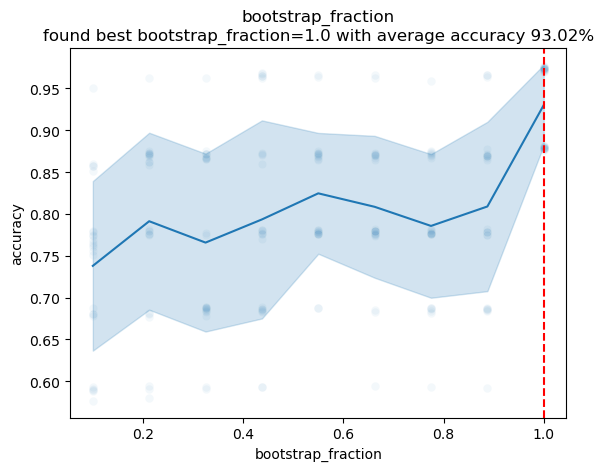

{'max_features': 5,
 'bootstrap_fraction': 1.0,
 'sampling_temperature': 0,
 'tree_kwargs': {'kind': 'c45', 'validation_ratio': 0.4, 'max_depth': 8},
 'n_estimators': 10}

In [219]:
with Pool(24) as pool:
    rl_c45_args = plot_factor_dependency(X2, Y2, rf_constructor, 'bootstrap_fraction', np.linspace(0.1, 1, 9), rl_c45_args, reps=24, pool=pool)
rl_c45_args

### Sampling Temperature

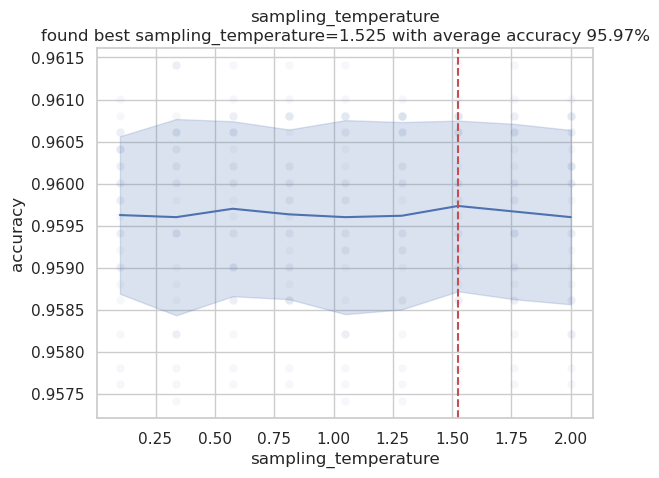

{'max_features': 6,
 'bootstrap_fraction': 0.8875,
 'sampling_temperature': 1.525,
 'tree_kwargs': {'kind': 'id3', 'max_depth': 4},
 'n_estimators': 120}

In [330]:
with Pool(24) as pool:
    rl_id3_args = plot_factor_dependency(X2, Y2, rf_constructor, 'sampling_temperature', np.linspace(0.1, 2, 9), rl_id3_args, reps=24, pool=pool)
rl_id3_args

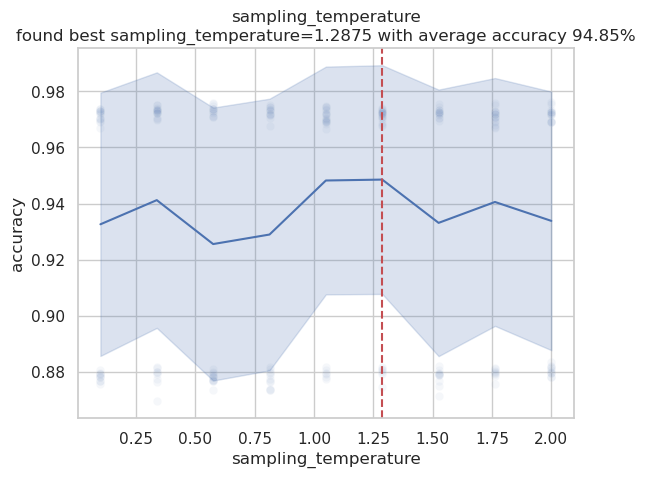

{'max_features': 5,
 'bootstrap_fraction': 1.0,
 'sampling_temperature': 1.2875,
 'tree_kwargs': {'kind': 'c45', 'validation_ratio': 0.4, 'max_depth': 8},
 'n_estimators': 10}

In [331]:
with Pool(24) as pool:
    rl_c45_args = plot_factor_dependency(X2, Y2, rf_constructor, 'sampling_temperature', np.linspace(0.1, 2, 9), rl_c45_args, reps=24, pool=pool)
rl_c45_args

### Imbalanced DataSet

In [242]:
df3, columns = load_dataset('gender')
X3, Y3 = df3.drop(columns='target'), df3['target']

In [259]:
def create_imbalanced_cv_split(X, Y, train_male_fraction, random_state=0, n_splits=5):
    rng = np.random.RandomState(random_state)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rng)
    ret = []
    for train_idx, val_idx in skf.split(X, Y):
        train_male_idx = train_idx[Y[train_idx] == "Male"]
        train_female_idx = train_idx[Y[train_idx] == "Female"]
        target_male_count = len(train_male_idx)
        target_female_count = len(train_female_idx)
        if train_male_fraction < 0.5:
            target_male_count = round(target_female_count * train_male_fraction / (1 - train_male_fraction))
        else:
            target_female_count = round(target_male_count * (1 - train_male_fraction) / train_male_fraction)
            
        train_male_idx = rng.choice(train_male_idx, target_male_count, replace=False)
        train_female_idx = rng.choice(train_female_idx, target_female_count, replace=False)
        train_idx = np.concatenate([train_male_idx, train_female_idx])
            
        ret.append((train_idx, val_idx))
    return ret

In [271]:
def evaluate_model_imbalanced(X, Y, model_constructor, model_args, n_splits=5, verbose=True, imbalance_ratio=0.5):
    """
    Evaluates the model using cross-validation and calculates accuracy.

    Parameters
    ----------
    X : DataFrame
        Features data.
    Y : Series
        Target data.
    model_constructor : callable
        Constructor for the model.
    model_args : dict
        Arguments for the model constructor.
    n_splits : int, optional
        The number of folds in the cross-validation, by default 5.
    verbose : bool, optional
        Whether to display extra output or not, by default True.

    Returns
    -------
    float
        Accuracy of the model.
    """
    preds = []
    gt = []
    
    for i, (train_indices, val_indices) in enumerate(
            create_imbalanced_cv_split(X, Y, imbalance_ratio, random_state=model_args['random_seed'], n_splits=n_splits)):
        model = model_constructor(**model_args)
        model.fit(X.iloc[train_indices], Y.iloc[train_indices])
        preds.append(model.predict(X.iloc[val_indices]))
        gt.append(Y.iloc[val_indices])

    preds = np.concatenate(preds)
    gt = np.concatenate(gt)
    if verbose:
        ConfusionMatrixDisplay.from_predictions(gt, preds, normalize="all")
    return (preds == gt).mean()

0.02


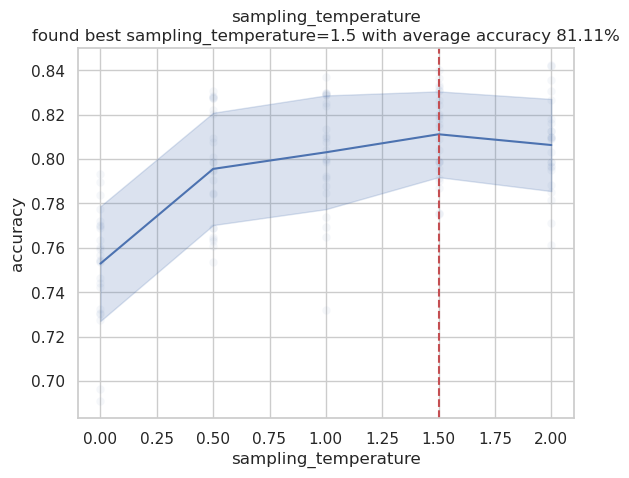

0.04


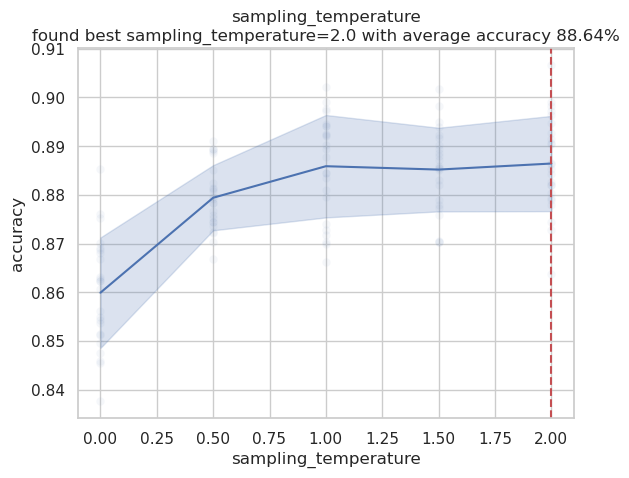

0.06


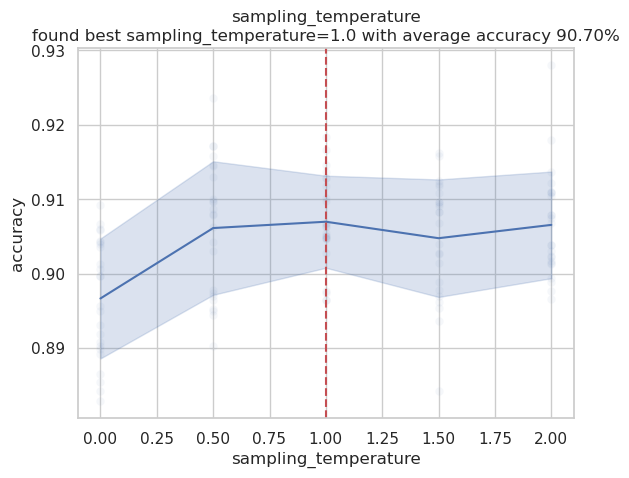

0.08


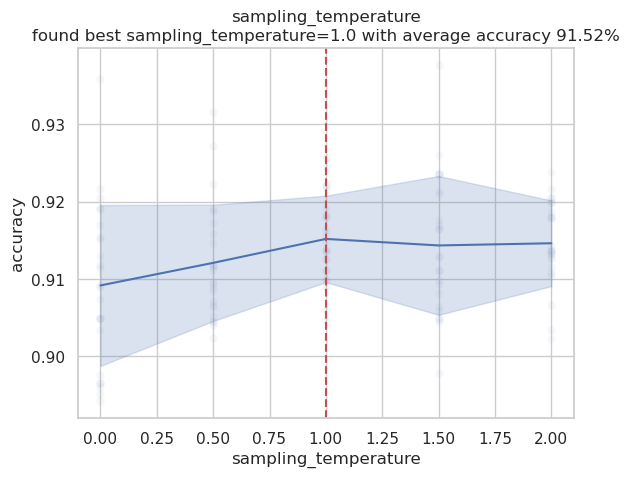

0.1


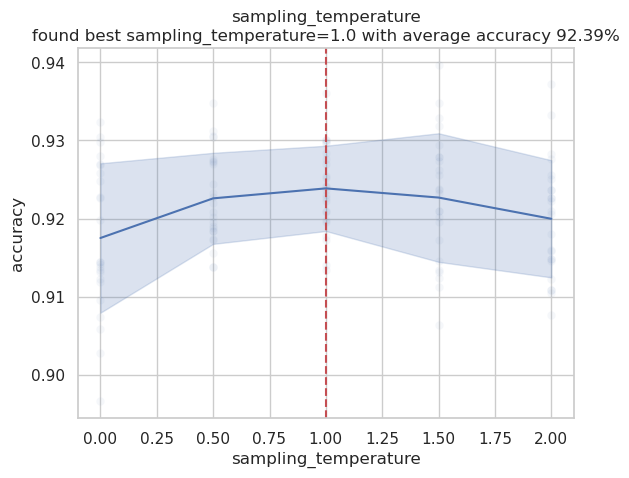

CPU times: user 1.53 s, sys: 387 ms, total: 1.91 s
Wall time: 6min 28s


In [322]:
%%time
with Pool(24) as pool:
    for imbalance in np.linspace(0.02, 0.1, 5):
        print(imbalance)
        plot_factor_dependency(X3, Y3, rf_constructor, 'sampling_temperature', np.linspace(0, 2, 5),
                               { 'max_features': 5,
                                 'bootstrap_fraction': 0.5,
                                 'tree_kwargs': {'kind': 'sklearn', 'max_depth': 4},
                                 'n_estimators': 20,
                               },
                               reps=24, pool=pool, evaluate_model=partial(evaluate_model_imbalanced, imbalance_ratio=imbalance))

In [317]:
import importlib
import algorithms.RandomForest
importlib.reload(algorithms.RandomForest)
RandomForest = algorithms.RandomForest.RandomForest

0.02


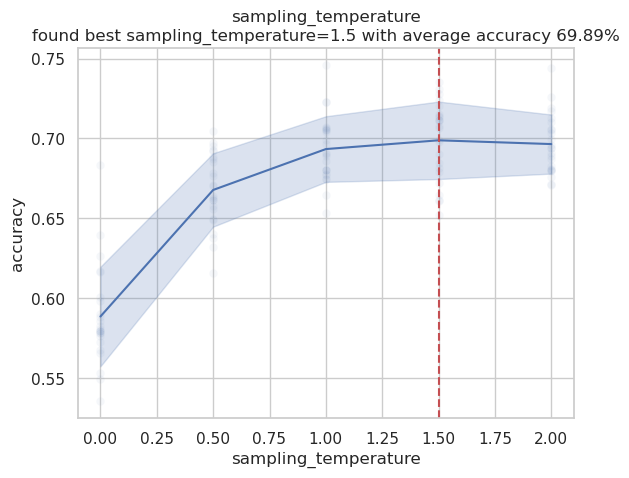

0.04


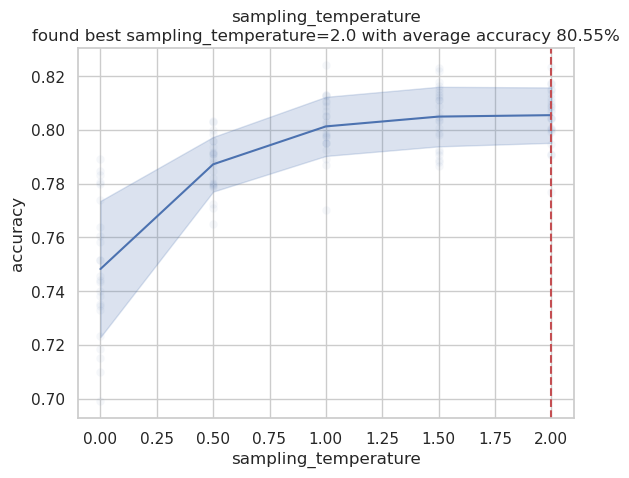

0.06


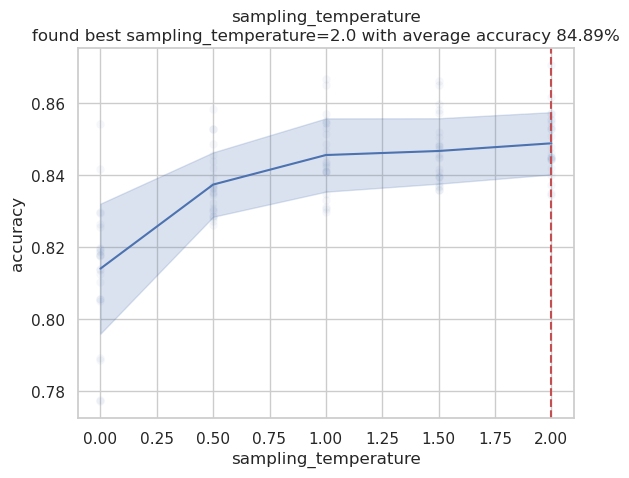

0.08


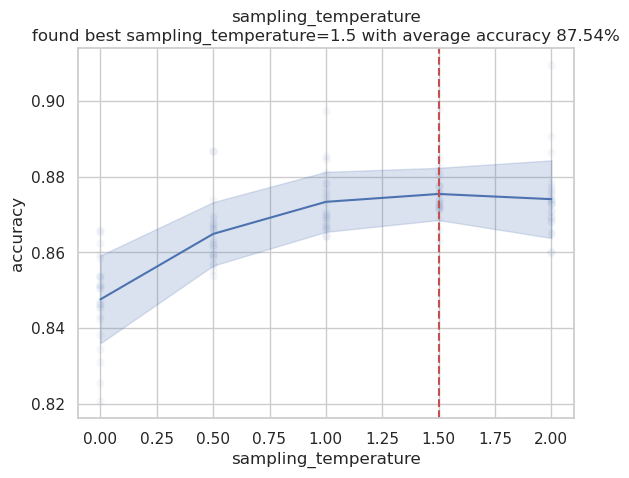

0.1


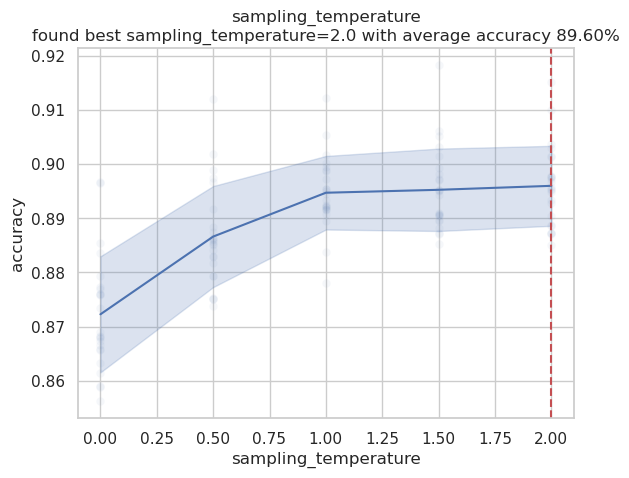

In [323]:
with Pool(24) as pool:
    for imbalance in np.linspace(0.02, 0.1, 5):
        print(imbalance)
        plot_factor_dependency(X3, Y3,
                               partial(RandomForest, tree_constructor=partial(SklearnModel, sklearn.linear_model.LogisticRegression, discrete_feature_order=columns)),
                                'sampling_temperature', np.linspace(0, 2, 5),
                               { 'max_features': 4,
                                 'bootstrap_fraction': 0.5,
                                 'n_estimators': 20,
                               },
                               reps=24, pool=pool, evaluate_model=partial(evaluate_model_imbalanced, imbalance_ratio=imbalance))